# CRISPR Prime Editing Guide RNA Design for Tay Sachs Disease 
### Upload of Sequences 
+ Firstly, we are getting fasta sequences of HEXA gene from NCBI database as a fasta file format. For this, we are using Bio.Seq module in python. SeqIO module is to provide a simple sequence file formats.
+ Also, in this part, we are showing lenght of HEXA gene and nucleotide frequency of HEXA gene with bar chart. 

In [2]:
from Bio.Seq import Seq

In [3]:
dir(Seq)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'back_transcribe',
 'complement',
 'complement_rna',
 'count',
 'count_overlap',
 'encode',
 'endswith',
 'find',
 'index',
 'join',
 'lower',
 'lstrip',
 'reverse_complement',
 'reverse_complement_rna',
 'rfind',
 'rindex',
 'rsplit',
 'rstrip',
 'split',
 'startswith',
 'strip',
 'tomutable',
 'transcribe',
 'translate',
 'ungap',
 'upper']

In [4]:
from Bio import SeqIO

In [5]:
for record in SeqIO.parse("hexa.fasta","fasta"):
    print(record.id)
    print(record.description)

NC_000015.10:c72376014-72340924
NC_000015.10:c72376014-72340924 Homo sapiens chromosome 15, GRCh38.p13 Primary Assembly


In [6]:
print(record)

ID: NC_000015.10:c72376014-72340924
Name: NC_000015.10:c72376014-72340924
Description: NC_000015.10:c72376014-72340924 Homo sapiens chromosome 15, GRCh38.p13 Primary Assembly
Number of features: 0
Seq('CTCACGTGGCCAGCCCCCTCCGAGAGGGGAGACCAGCGGGCCATGACAAGCTCC...GTA')


In [10]:
hexA_dna= SeqIO.read("hexa.fasta","fasta")

In [11]:
print(hexA_dna)

ID: NC_000015.10:c72376014-72340924
Name: NC_000015.10:c72376014-72340924
Description: NC_000015.10:c72376014-72340924 Homo sapiens chromosome 15, GRCh38.p13 Primary Assembly
Number of features: 0
Seq('CTCACGTGGCCAGCCCCCTCCGAGAGGGGAGACCAGCGGGCCATGACAAGCTCC...GTA')


In [12]:
# The length of HEXA gene
len(hexA_dna)

35091

In [15]:
# The nucleotide frequency of HEXA gene 
bases= {"A": 0, "T":0, "G":0, "C":0}
for i in hexA_dna:
    if(i=="A"):
        bases["A"] +=1
    elif(i=="T"):
        bases["T"] +=1
    elif(i=="G"):
        bases["G"] +=1
    elif(i=="C"):
        bases["C"] +=1
    
    else:
        pass
print("Nucleotide freq. of HEXA is: ",bases)

Nucleotide freq. of HEXA is:  {'A': 9378, 'T': 9730, 'G': 8746, 'C': 7237}


In [17]:
# Bar Chart 
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

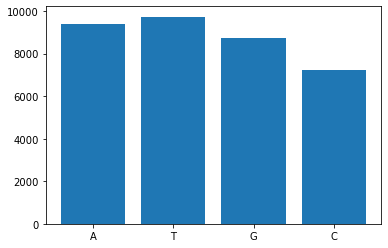

In [18]:
plt.bar(bases.keys(),bases.values())

+ Secondly, we are determining to target zone benefit benchling visualzing software. The target zone include our all mutations.  

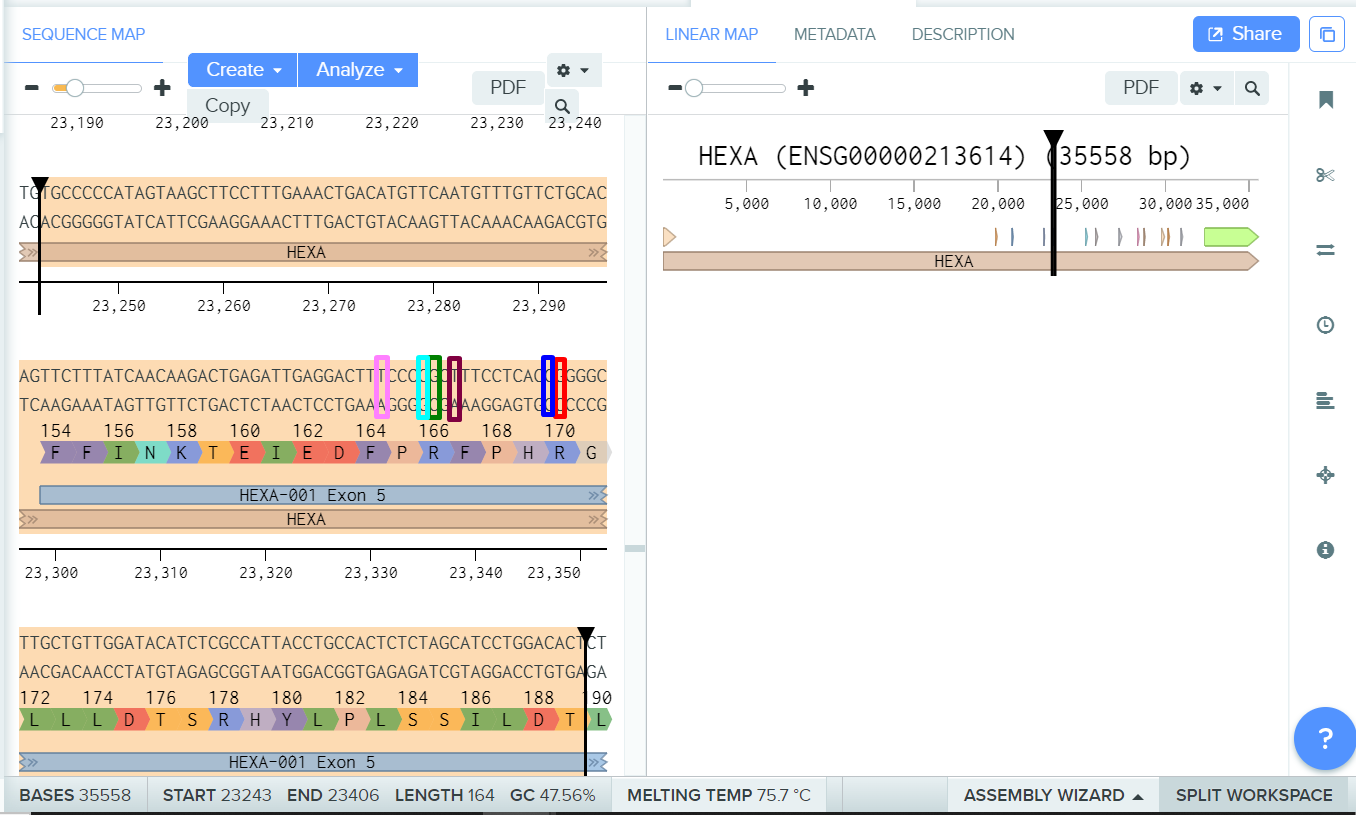

##### Pink is 492T>G, turquoise is 496del , green is 497G>A, claret red is 499T>G, blue is 508C>T and red is 509G>A mutation.

In [19]:
# The target zone for CRISPR-PE system
target= hexA_dna.seq[22530:23360]

In [20]:
print(target)

CATTTAGTAATGACCTTGAGGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTTTCCCCGCTTTCCTCACCGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGCATCCTGGACACTCTGGTAACCAGGCCTTAAGGCCTTCTTCACACTTAAGAGTTCTAGGGTGATGGAGCAACGGACAGACCAAGTTCCAAATTCTTAAAGAGTTAGAGAGGGAATGTATGGACTGGGTGTGGTGGCTCATGCCTGTAATCCCAACACTTTGGGAGGCCGAGGTGGGCGGATCACCTGAAGTCAGAAGTTCAAGGCCAGCCTGGCCAACATGGTGAAACTCTGTCTCTACTAAAAATACAAAAATTAGCTGGGCATGGTGGTGCATGCTTGTAATCCCAGCTACCTGGGAGGCTGAGGCAGGAGAATCGCATGAACCCAGGAGGCAGAGGTTGCAGTGGGTGGAGATCACGCCACTGCACTCCAGCCTGGGTGAAAGAGTGAGACGCTGTCTCAAAAAAAAAAAAAAAAATTGTATGTAA


### As the third step; we are finding PAM sequence (NGG) and then we are designing our pegRNA sequences. 

In [24]:
import re

In [30]:
def findPAM_seq(sequence):
    
    if str("GG") in sequence:
        for startmatch in re.finditer("GG",sequence):
            remaining= sequence[startmatch.start():]
            print("+",remaining,"---")

In [31]:
target1_mutation_sequence= "CATTTAGTAATGACCTTGAGGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGCATCCTGGACACTCTGGTAACCAGGCCTTAAGGCCTTCTTCACACTTAAGAGTTCTAGGGTGATGGAGCAACGGACAGACCAAGTTCCAAATTCTTAAAGAGTTAGAGAGGGAATGTATGGACTGGGTGTGGTGGCTCATGCCTGTAATCCCAA"

In [32]:
findPAM_seq(target1_mutation_sequence)

+ GGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGCATCCTGGACACTCTGGTAACCAGGCCTTAAGGCCTTCTTCACACTTAAGAGTTCTAGGGTGATGGAGCAACGGACAGACCAAGTTCCAAATTCTTAAAGAGTTAGAGAGGGAATGTATGGACTGGGTGTGGTGGCTCATGCCTGTAATCCCAA ---
+ GGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGCATCCTGGACACTCTGGTAACCAGGCCTTAAGGCCTTCTTCACACTTAAGAGTTCTAGGGTGATGGAGCAACGGACAGACCAAGTTCCAAATTCTTAAAGAGTTAG

In [33]:
findPAM_seq(target1_mutation_sequence[::-1])

+ GGTGGTGTGGGTCAGGTATGTAAGGGAGAGATTGAGAAATTCTTAAACCTTGAACCAGACAGGCAACGAGGTAGTGGGATCTTGAGAATTCACACTTCTTCCGGAATTCCGGACCAATGGTCTCACAGGTCCTACGATCTCTCACCGTCCATTACCGCTCTACATAGGTTGTCGTTCGGGGt*CACTCCTTTCGCCCCc*TTCAGGAGTTAGAGTCAGAACAACTATTTCTTGACACGTCTTGTTTGTAACTTGTACAGTCAAAGTTTCCTTCGAATGATACCCCCGTGTCCCTCTACTTCTGTTGAGAGGGTCCTAAGAATTTTTCGGTTAGACACTGACAAGAGTCCCAGCGAGAGAGGGATTTACGAGGGGTGGAGATATTTACTGGTATTCGTCGGTGGAAGGGTCTCTCGTTAACAGGTTGCGGTCGGATTATGTTGACAGGGTTTGTGGTGAGTCGGATGTTTAAGACCTAAAAGGACAATTGTATCAAATAAAAGAAGTTTCGTCACACCGGAGTTCCAGTAATGATTTAC ---
+ GGTGTGGGTCAGGTATGTAAGGGAGAGATTGAGAAATTCTTAAACCTTGAACCAGACAGGCAACGAGGTAGTGGGATCTTGAGAATTCACACTTCTTCCGGAATTCCGGACCAATGGTCTCACAGGTCCTACGATCTCTCACCGTCCATTACCGCTCTACATAGGTTGTCGTTCGGGGt*CACTCCTTTCGCCCCc*TTCAGGAGTTAGAGTCAGAACAACTATTTCTTGACACGTCTTGTTTGTAACTTGTACAGTCAAAGTTTCCTTCGAATGATACCCCCGTGTCCCTCTACTTCTGTTGAGAGGGTCCTAAGAATTTTTCGGTTAGACACTGACAAGAGTCCCAGCGAGAGAGGGATTTACGAGGGGTGGAGATATTTACTGGTATTCGTCGGTGGAAGGGTCTCTCGTTAACAGGTTGCGGTCGGATTATGTTGACAGGGTTTGTGGT

In [34]:
# Our pegRNA CRISPR sequence (for c492T>C mutation)
pegRNA_spacer= "AGCCCCGGTGAGGAAAGCGG"
rt_template= "TTGAGGACTTtCCCCG"
PBS= "CTTTCCTCACCGGGGCTT"
scaffold= "TTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGC"

In [35]:
pegRNA1=pegRNA_spacer+scaffold+rt_template+PBS

In [36]:
print(pegRNA1)

AGCCCCGGTGAGGAAAGCGGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTTGAGGACTTtCCCCGCTTTCCTCACCGGGGCTT


In [42]:
# Our pegRNA sequence (for c496del mutation)
pegRNA_spacer= "AGCCCCGGTGAGGAAAGCGG"
rt_template= "TGAGGACTTTcCCCGCT"
PBS= "TTCCTCACCGGGGCTT"
scaffold= "GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCT"

In [43]:
pegRNA2= pegRNA_spacer +scaffold+rt_template+PBS

In [44]:
print(pegRNA2)

AGCCCCGGTGAGGAAAGCGGGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTTGAGGACTTTcCCCGCTTTCCTCACCGGGGCTT


In [45]:
# Our pegRNA sequence (for c497G>A mutation)
pegRNA_spacer= "AAGCCCCGGTGAGGAAAGtG"
rt_template= "GACTTTCCCCgC"
PBS= "TTTCCTCACCGGGGCTT"
scaffold="GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCT"

In [46]:
pegRNA3= pegRNA_spacer +scaffold+rt_template+PBS

In [47]:
print(pegRNA3)

AAGCCCCGGTGAGGAAAGtGGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTGACTTTCCCCgCTTTCCTCACCGGGGCTT


In [48]:
# Our pegRNA sequence (for c499T>G mutation)
pegRNA_spacer= "AAGCCCCGGTGAGGAAcGC"
rt_template= "ACTTTCCCCGCt"
PBS= "TTCCTCACCGGGGCTT"
scaffold= "GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCT"

In [49]:
pegRNA4= pegRNA_spacer +scaffold+rt_template+PBS

In [50]:
print(pegRNA4)

AAGCCCCGGTGAGGAAcGCGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTACTTTCCCCGCtTTCCTCACCGGGGCTT


In [51]:
# Our pegRNA sequence (for c508C>T mutation)
pegRNA_spacer ="CCGCTTTCCTCACCGGGGCTTtG"
rt_template= "AGCAAGCCCCgG"
PBS= "TGAGGAAAGCGGGGA"
scaffold= "GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCT"

In [52]:
pegRNA5= pegRNA_spacer + scaffold+ rt_template + PBS

In [53]:
print(pegRNA5)

CCGCTTTCCTCACCGGGGCTTtGGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTAGCAAGCCCCgGTGAGGAAAGCGGGGA


In [54]:
# Our pegRNA sequence (for c509G>A mutation) 
pegRNA_spacer= "TTTCCCCGCTTTCCTCACCa"
rt_template= "ACAGCAAGCCCcGG"
PBS= "TGAGGAAAGCGGGGA"
scaffold="GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCT"

In [55]:
pegRNA6= pegRNA_spacer + scaffold+ rt_template + PBS

In [56]:
print(pegRNA6)

TTTCCCCGCTTTCCTCACCaGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTACAGCAAGCCCcGGTGAGGAAAGCGGGGA


### Finally, we are calculating GC content raito of our pegRNA sequences and showing in a plot.

In [57]:
def GC_content(sequence):
    gc_content= (sequence.count("G")+sequence.count("C"))/len(sequence)*100
    return gc_content

def AT_content(sequence):
    at_content= (sequence.count("A")+sequence.count("T"))/len(sequence)*100
    return at_content

In [60]:
print("GC content ratio of pegRNA1:",GC_content(pegRNA1.upper()))
print("GC content ratio of pegRNA2:",GC_content(pegRNA2.upper()))
print("GC content ratio of pegRNA3:",GC_content(pegRNA3.upper()))
print("GC content ratio of pegRNA4:",GC_content(pegRNA4.upper()))
print("GC content ratio of pegRNA5:",GC_content(pegRNA5.upper()))
print("GC content ratio of pegRNA6:",GC_content(pegRNA6.upper()))

GC content ratio of pegRNA1: 49.6124031007752
GC content ratio of pegRNA2: 50.0
GC content ratio of pegRNA3: 48.41269841269841
GC content ratio of pegRNA4: 49.193548387096776
GC content ratio of pegRNA5: 50.39370078740157
GC content ratio of pegRNA6: 48.41269841269841


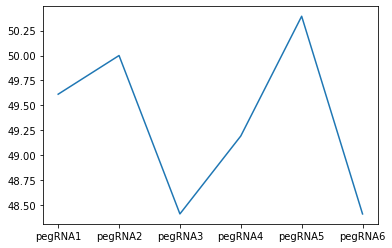

In [62]:
plt.plot(["pegRNA1","pegRNA2","pegRNA3","pegRNA4","pegRNA5","pegRNA6"],[GC_content(pegRNA1.upper()),GC_content(pegRNA2.upper()),GC_content(pegRNA3.upper()),GC_content(pegRNA4.upper()),GC_content(pegRNA5.upper()),GC_content(pegRNA6.upper())])

In [65]:
print("AT content ratio of pegRNA1:",AT_content(pegRNA1.upper()))
print("AT content ratio of pegRNA2:",AT_content(pegRNA2.upper()))
print("AT content ratio of pegRNA3:",AT_content(pegRNA3.upper()))
print("AT content ratio of pegRNA4:",AT_content(pegRNA4.upper()))
print("AT content ratio of pegRNA5:",AT_content(pegRNA5.upper()))
print("AT content ratio of pegRNA6:",AT_content(pegRNA6.upper()))

AT content ratio of pegRNA1: 50.3875968992248
AT content ratio of pegRNA2: 50.0
AT content ratio of pegRNA3: 51.587301587301596
AT content ratio of pegRNA4: 50.806451612903224
AT content ratio of pegRNA5: 49.60629921259843
AT content ratio of pegRNA6: 51.587301587301596


In [66]:
import py3Dmol

In [67]:
view_hexA= py3Dmol.view(query="pdb:2GJX")

In [68]:
view_hexA.setStyle({'cartoon':{'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [70]:
from Bio.Seq import Seq

In [72]:
from Bio import pairwise2

In [79]:
alignment1= pairwise2.align.globalxx(pegRNA1,target1_mutation_sequence)
alignment2= pairwise2.align.globalxx(pegRNA2,target1_mutation_sequence)
alignment3= pairwise2.align.globalxx(pegRNA3,target1_mutation_sequence)
alignment4= pairwise2.align.globalxx(pegRNA4,target1_mutation_sequence)
alignment5= pairwise2.align.globalxx(pegRNA5,target1_mutation_sequence)
alignment6= pairwise2.align.globalxx(pegRNA6,target1_mutation_sequence)

In [78]:
print(alignment1[0])

Alignment(seqA='-A----G------CC------CC-----G----G-------T-------G--A---GGAAA-----G----------C-G-GT--T-TT----A--G----A---G-CTAG-------A-AAT-----------A-G----C-----A-----A------G---T--------T--A---A-A-A-------T-A-A---G-----G-----CT----A-G--TCC-G------TT------ATC-------------A-A-----CTT-----GAAA---A-A-GT-----G---G--C---AC----C-----------GA--G---T------C--------G------------G----T-GCT-T-G-A--------G---------G--ACT-TtC---C--CC-G--C--T-T--T--CC-----T-----C-------AC-C----G-G-----GG---------C---------------TT--------------------------------------------------------------------', seqB='CATTTAGTAATGACCTTGAGGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCT-GGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCT-CTAGCATCCTGGACA

In [80]:
print(alignment2[0])

Alignment(seqA='-A----G------CC------CC-----G----G-------T-------G--A---GGAAA-----G----------C-G-G-G-T-TTT---A--G----A---G-CTAG-------A-AAT-----------A-G----C-----A-----A------G---T--------T--A---A-A-A-------T-A-A---G-----G-----CT----A-G--TCC-G------TT------ATC-------------A-A-----CTT-----GAAA---A-A-GT-----G---G--C---AC----C-----------GA--G---T------C--------G------------G----T-GCT-T-G-A--------G---------G--ACT-T-Tc--C--CC-G--C--T-T--T--CC-----T-----C-------AC-C----G-G-----GG---------C---------------TT--------------------------------------------------------------------', seqB='CATTTAGTAATGACCTTGAGGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCT-GGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCT-AGCATCCTGGACA

In [81]:
print(alignment3[0])

Alignment(seqA='-A---AG------CC------CCG-----G-T--GA-G------------G--AA-AGtG--------G--TTT-TAG----AG------------C--T---A---G-----------A-AAT-----------A-G----C-----A-----A------G---T--------T--A---A-A-A-------T-A-A---G-----G-----CT----A-G--TCC-G------TT------ATC-------------A-A-----CTT-----GAAA---A-A-GT-----G---G--C---AC----C-----------GA--G---T------C--------G------------G----T-GCTG----A--C-T-T-----T--CC--CCg-CT-T-T--C--C-T---CAC-C-GG------GGC-TT-----------------------------------------------------------------------------------------------------------------------------', seqB='CATTTAGTAATGACCTTGAGGCC-ACACTGCTTTGAAGAAAATAAACTATGTTAACAG-GAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCC-ACTCTCTAGCATCCTGGA

In [82]:
print(alignment4[0])

Alignment(seqA='-A---AG------CC------CCG-----G-T--GA-G------------G--AAc--G------C--G--TTT-TAG----AG------------C--T---A---G-----------A-AAT-----------A-G----C-----A-----A------G---T--------T--A---A-A-A-------T-A-A---G-----G-----CT----A-G--TCC-G------TT------ATC-------------A-A-----CTT-----GAAA---A-A-GT-----G---G--C---AC----C-----------GA--G---T------C--------G------------G----T-GCT-----A--C-T-T-----T--CC--CC--------GCt-T--T---C-CTC----A-CC-GG------GGC-TT---------------------------------------------------------------------------------------------------------------------', seqB='CATTTAGTAATGACCTTGAGGCC-ACACTGCTTTGAAGAAAATAAACTATGTTAA-CAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGC-ATCCTGGA

In [83]:
print(alignment5[0])

Alignment(seqA='C------------C---G---C-----T--TT-------------C--------C-------TC-A-----------C----------------C-G--G-----GGCT----Tt-GG----TT--T-T-----A-G----------A-G--C-T--A--GA-------A--AT--AG--------C-A-----AG-----T------T---------AA-AAT------A-AG--G-CT--A-------GT-CC------GT----T-------A---T--CA-----A---------CT------T-------------GA---A-A---A--A---------G-T----------GG--C----------A--C--C--G--A------G----TC----G------G-----T--G----C------T-A-G-C-------A-A-----G----C-------------C--C---Cg-G------T--------------GAG---GA-A---A--G------C-GGG-G---------A---------------', seqB='CATTTAGTAATGACCTTGAGGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGACAGTTGTATTAGGCTGGCGT-TGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGCATCCTGGACAC

In [84]:
print(alignment6[0])

Alignment(seqA='--TTT--------CC------CC-----GCTTT------------C--------C-------TC-A-----------C----------------Ca-GTT-T-T-AG-----------A-----GCT-------A-G----------A-----A---ATAG----------CA---AG--------------T--------T-A-A-A----------A----T------A-AG--G-CT--A-------GT-CC------GT----T-------A---T--CA-----A---------CT------T-------------GA---A-A---A--A---------G-T----------GG--C----------A--C--C--G--A------G----TC----G------G-----T--G----C------T-A---C-------A-------G----C-A-----A-G---C--C---Cc-G-----GT--------------GAG---GA-A---A--G------C-GGG-G---------A---------------', seqB='CATTTAGTAATGACCTTGAGGCCACACTGCTTTGAAGAAAATAAACTATGTTAACAGGAAAATCCAGAATTTGTAGGCTGAGTGGTGTTTGGGAC-AGTTGTATTAGGCTGGCGTTGGACAATTGCTCTCTGGGAAGGTGGCTGCTTATGGTCATTTATAGAGGTGGGGAGCATTTAGGGAGAGAGCGACCCTGAGAACAGTCACAGATTGGCTTTTTAAGAATCCTGGGAGAGTTGTCTTCATCTCCCTGTGCCCCCATAGTAAGCTTCCTTTGAAACTGACATGTTCAATGTTTGTTCTGCACAGTTCTTTATCAACAAGACTGAGATTGAGGACTT*cCCCCGCTTTCCTCAC*tGGGGCTTGCTGTTGGATACATCTCGCCATTACCTGCCACTCTCTAGCATCCTGGACAC